In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import galport

In [7]:
# Load coordinates, velocities and actions

xv_act = np.load('../data/xv_act_0.npy')

t = np.arange(0, 600.125, 0.125)
xv = xv_act[:,:,0:6]
act = xv_act[:,:,6:9]

theta_p = np.load('../data/theta_p.npy')
Omega_p = np.load('../data/omega_p.npy')

In [8]:
%%time
# Find actions, angles and frequencies of 
# the every orbit

OT = galport.OrbitTools(t=t, xv=xv, act=act)
data = OT.calculate_actions(secular=True)
otype_ILR = OT.classify_orbits(t_out=400, family='ILR', theta_p=theta_p)
otype_vILR = OT.classify_orbits(t_out=400, family='vILR', theta_p=theta_p)
otype_uha = OT.classify_orbits(t_out=400, family='uha', theta_p=theta_p)

CPU times: user 2.39 s, sys: 25 ms, total: 2.42 s
Wall time: 2.42 s


````
 List of types
-------------
    0 : Not classify
    1 : Increasing angle
    2 : Decreasing angle
    3 : Resonance around 0
    4 : Resonance around pi
    5 : Passage through 0 from omega_res > 0 to omega_res < 0
    6 : Passage through pi from omega_res > 0 to omega_res < 0
    7 : Passage through 0 from omega_res < 0 to omega_res > 0
    8 : Passage through pi from omega_res < 0 to omega_res > 0
````

In [9]:
# Secular variables
t = 400
n_t = int(t)*8

JR_sec = data[:,n_t,9]
Jz_sec = data[:,n_t,10]
Lz_sec = data[:,n_t,11]

kappa_sec = data[:,n_t,12]
omegaz_sec = data[:,n_t,13]
Omega_sec = data[:,n_t,14] - Omega_p[n_t]

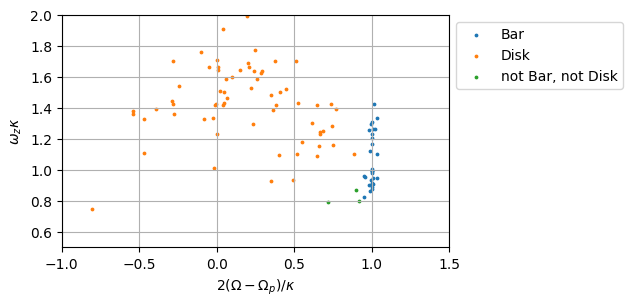

In [12]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_aspect('equal')

ax.grid(zorder=-1)

test_bar = (otype_ILR > 2)
test_notbarnotdisk = (otype_ILR <= 2) & (otype_uha == 1) & (otype_vILR == 2)
test_disk = ~test_bar & ~test_notbarnotdisk


ax.scatter(
    2*Omega_sec[test_bar]/kappa_sec[test_bar],
    omegaz_sec[test_bar]/kappa_sec[test_bar],
    s=3, label='Bar'
)

ax.scatter(
    2*Omega_sec[test_disk]/kappa_sec[test_disk],
    omegaz_sec[test_disk]/kappa_sec[test_disk],
    s=3, label='Disk'
)

ax.scatter(
    2*Omega_sec[test_notbarnotdisk]/kappa_sec[test_notbarnotdisk],
    omegaz_sec[test_notbarnotdisk]/kappa_sec[test_notbarnotdisk],
    s=3, label='not Bar, not Disk'
)


ax.set_xlabel('$2(\\Omega - \\Omega_p)/\\kappa$')
ax.set_ylabel('$\\omega_z\\kappa$')
ax.legend(
    loc='upper left',
    bbox_to_anchor=(1., 1.)
)

ax.set_xlim(-1.0,1.5)
ax.set_ylim(0.5, 2)

plt.show()